In [1]:
import pandas as pd 
df=pd.read_csv("airline.csv")

In [2]:
df.head()

,Month,Passengers
0,1949-01,112
1,1949-02,118
2,1949-03,132
3,1949-04,129
4,1949-05,121


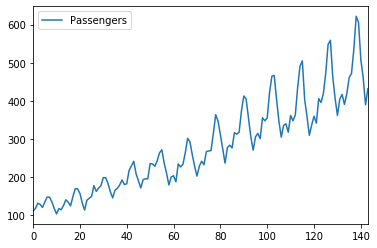

In [7]:
import matplotlib.pyplot as plt
df.plot()
plt.show()

In [8]:
import numpy
import matplotlib.pyplot as plt
import pandas
from keras.models import Sequential
from keras.layers import Dense

In [21]:

dataframe = pandas.read_csv('airline.csv', usecols=[1])
dataset = dataframe.values
dataset = dataset.astype('float32')
dataset[:10]

array([[112.],
       [118.],
       [132.],
       [129.],
       [121.],
       [135.],
       [148.],
       [148.],
       [136.],
       [119.]], dtype=float32)

In [18]:
dataset.shape

(144, 1)

With time series data, the sequence of values is important. A simple method that we can use is to split the ordered dataset into train and test datasets. The code below calculates the index of the split point and separates the data into the training datasets with 67% of the observations that we can use to train our model, leaving the remaining 33% for testing the mode

In [16]:
# split into train and test sets
train_size = int(len(dataset) * 0.67)
test_size = len(dataset) - train_size
train, test = dataset[0:train_size,:], dataset[train_size:len(dataset),:]
print(len(train), len(test))

96 48


In [22]:
#We can write a simple function to convert our single column of data into a two-column dataset:
#the first column containing this month’s (t) passenger count and the second column containing next month’s (t+1) passenger count
#, to be predicted.
# convert an array of values into a dataset matrix
def create_dataset(dataset, look_back=1):
    dataX, dataY = [], []
    for i in range(len(dataset)-look_back-1):
        a = dataset[i:(i+look_back), 0]
        dataX.append(a)
        dataY.append(dataset[i + look_back, 0])
    return numpy.array(dataX), numpy.array(dataY)

In [23]:

# reshape into X=t and Y=t+1
look_back = 1
trainX, trainY = create_dataset(train, look_back)
testX, testY = create_dataset(test, look_back)

In [24]:
#model.add(LSTM(4, input_shape=(1, look_back))) #for lstm case
#model.add(Dense(1))
# create and fit Multilayer Perceptron model
model = Sequential()
model.add(Dense(8, input_dim=look_back, activation='relu'))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')
model.fit(trainX, trainY, epochs=200, batch_size=2, verbose=2)

Epoch 1/200
47/47 - 0s - loss: 32667.8906
Epoch 2/200
47/47 - 0s - loss: 21520.1328
Epoch 3/200
47/47 - 0s - loss: 13569.7549
Epoch 4/200
47/47 - 0s - loss: 8157.3125
Epoch 5/200
47/47 - 0s - loss: 4627.6411
Epoch 6/200
47/47 - 0s - loss: 2570.6897
Epoch 7/200
47/47 - 0s - loss: 1449.3406
Epoch 8/200
47/47 - 0s - loss: 914.1325
Epoch 9/200
47/47 - 0s - loss: 679.2131
Epoch 10/200
47/47 - 0s - loss: 585.9379
Epoch 11/200
47/47 - 0s - loss: 555.8769
Epoch 12/200
47/47 - 0s - loss: 544.0306
Epoch 13/200
47/47 - 0s - loss: 538.7450
Epoch 14/200
47/47 - 0s - loss: 538.1535
Epoch 15/200
47/47 - 0s - loss: 540.4816
Epoch 16/200
47/47 - 0s - loss: 537.9549
Epoch 17/200
47/47 - 0s - loss: 541.6347
Epoch 18/200
47/47 - 0s - loss: 540.8158
Epoch 19/200
47/47 - 0s - loss: 538.0417
Epoch 20/200
47/47 - 0s - loss: 537.1394
Epoch 21/200
47/47 - 0s - loss: 544.2551
Epoch 22/200
47/47 - 0s - loss: 544.1786
Epoch 23/200
47/47 - 0s - loss: 540.3799
Epoch 24/200
47/47 - 0s - loss: 541.2687
Epoch 25/200
47

Epoch 199/200
47/47 - 0s - loss: 539.5103
Epoch 200/200
47/47 - 0s - loss: 548.9400


In [26]:
# Estimate model performance
import math
trainScore = model.evaluate(trainX, trainY, verbose=0)
print('Train Score: %.2f MSE (%.2f RMSE)' % (trainScore, math.sqrt(trainScore)))
testScore = model.evaluate(testX, testY, verbose=0)
print('Test Score: %.2f MSE (%.2f RMSE)' % (testScore, math.sqrt(testScore)))

Train Score: 531.26 MSE (23.05 RMSE)
Test Score: 2352.93 MSE (48.51 RMSE)


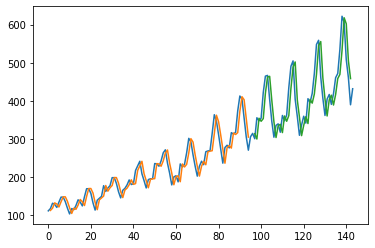

In [27]:
# generate predictions for training
trainPredict = model.predict(trainX)
testPredict = model.predict(testX)
# shift train predictions for plotting
trainPredictPlot = numpy.empty_like(dataset)
trainPredictPlot[:, :] = numpy.nan
trainPredictPlot[look_back:len(trainPredict)+look_back, :] = trainPredict
# shift test predictions for plotting
testPredictPlot = numpy.empty_like(dataset)
testPredictPlot[:, :] = numpy.nan
testPredictPlot[len(trainPredict)+(look_back*2)+1:len(dataset)-1, :] = testPredict
# plot baseline and predictions
plt.plot(dataset)
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()